### Jose Luis Huillca Mango - Aprendizado de Maquina - UFF

## Practical Work: Recognizing Iris flowers ##

## Introduction

This first homework has to do with the classical problem of recognizing different species of Iris flowers relying on the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in his 1936 paper *"The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis"*.

* The data set consists of 50 samples from each of three species of Iris (*Iris setosa*, *Iris virginica* and *Iris versicolor*). 
* Four features were measured from each sample, the length and the width of the sepals and petals, in centimeters. 
* Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Similarly, we will use this homework to get you familiarized with `numpy` and `scikit-learn`.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
           <img src='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/iris-machinelearning.png' />
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>

## Problem description

**If we want to design an algorithm to recognize iris species, what might the data be?**

* We need a 2D array of size `[n_samples x n_features]`.

    - What would the `n_samples` refer to?
    - What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

## Loading the Iris Data with `scikit-learn`

`scikit-learn` has a very straightforward set of data on these iris species.  The data consist of
the following:

* Features in the Iris dataset:
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

* Target classes to predict:
  1. Iris setosa
  2. Iris versicolour
  3. Iris virginica

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [10]:
from sklearn.datasets import load_iris
iris_data = load_iris()

The resulting `iris_data` dataset is a `Bunch` object, that can be viewed as supercharged `dict`. For example, you can see what's available using the `keys()` method:

In [11]:
print(iris_data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


Let's visualize the relation between the attributes. If you are running the notebook locally you will be able to

In [12]:
# ploting support stuff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [13]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [14]:
@interact(x_feature_index=(0, 3), y_feature_index=(0, 3))
def plot_iris_scatter(x_feature_index=0, y_feature_index=1):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(
        lambda i, *args: iris_data.target_names[int(i)])

    plt.scatter(
        iris_data.data[:, x_feature_index],
        iris_data.data[:, y_feature_index],
        c=iris_data.target,
        cmap=cm.viridis)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris_data.feature_names[x_feature_index])
    plt.ylabel(iris_data.feature_names[y_feature_index])

interactive(children=(IntSlider(value=0, description='x_feature_index', max=3), IntSlider(value=1, description…

## Classifying with Multi Layer Perceptron

We classify iris data set with `Multilayer Perceptron`. We use the next estructure showed in the next figure. 

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
           <img src='MLP_diagram.png' />
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>

We use numpy library to manage arrays operations, in example: sum, array multiplications, add a element, ...

In [15]:
import numpy as np

We create a **`class Perceptron`**, where we store the weights(a list of weights), as the picture shows. The weights are filled with random weights, in a range of `-0.5 to 0.5`.

In [16]:
class JoseHuillcaPerceptron():
    w = None      # Weight's lists

    def __init__(self):
        self.w = []

    def fill_weights(self, size):
        random = np.random.uniform(-0.5, 0.5, size)
        self.w = random

We create a **`class Layer`** too. In this class we import the class Perceptron, and their parameters are:
* **type_layer:** it can be hidden layer or output layer, input layer is not necesary.
* **LP:** is a `class Perceptron` list, where store the weights, we can see as matrix too.
* **u_l:** is a list of the result of the propagation rule ( $u_i = \sum_{j=1}^{N} x_i*w_{ij} + \theta$ ), where $\theta$ is a bias, and $x_i$ is the data of input layer or `f_u_l`in hidden and output layer, $w_{ij}$ is a weight.
* **f_u_l:** is the result of apply a `activation function`, we only use `logistic` function, but we can add more functions.

In [17]:
class JoseHuillcaLayer():
    type_layer = ""
    LP = None               # Perceptron List
    u_l = None              # Propagation rule result(sumatoria(x_i*w_i_j)), is a list,
    f_u_l = None            # result of activation function of u_l, is a list

    def __init__(self, type_layer):
        self.type_layer = type_layer

    def create_perceptron_list(self, size):
        self.LP = []
        for i in range(size):
            p = JoseHuillcaPerceptron()
            self.LP.append(p)

    # print all weights of each Perceptron
    def print_weights(self):
        for i in range(len(self.LP)):
            print(i, self.type_layer, self.LP[i].w)

    # return all weights as matrix
    def get_all_weights_as_matrix(self):
        m_w = []
        for i in range(len(self.LP)):
            m_w.append(self.LP[i].w)
        return m_w

    # set all weights, where l is a vector
    def update_all_weights(self, l):
        for i in range(len(self.LP)):
            j = 0
            for n_x_e in l[i]:
                self.LP[i].w[j] = self.LP[i].w[j] + n_x_e
                j = j + 1


We create a **`class MLP`**, where we train the data. In this class we import the class Layer, and their parameters are:
* **hidden:** is a list of hidden layers, we have one function to create it. This function first take the size of the input (`len_input`) to create the first hidden layer with their weights(adding one to bias) for each Perceptron, later, create others hidden layers with the size of the layer before it. `hidden_sizes` is a list of sizes of hidden layers, each element represent the size of each hidden layer and the size of hidden_sizes is the number of hidden layers.
* **output:** is a output layer, we have one function to create it. This function take the size of the last hidden layer to create their weights(adding one to bias) and `len_output` to create a list of Perceptrons.
* **activation:** is a string, that represent a activation function, we use `logistic activation` function for default.
* **tol:** is a tolerance of error, if the squared error is smaller than `tol=1e-3` we don't need more training.
* **n:** is a learning rate, if `l_r=0.5` is too large, gradient descent can overshoot the minimum. It may fail to converge or even diverge. But if it is too small gradient descent can be small.
* **iter:** is a limit of number of iterations or epochs of training

In [63]:
class JoseHuillcaMLP():
    hidden = None       # a list of hidden Layers
    output = None       # output Layer
    activation = ""     # type activation function, used in derivative function too
    tol = None          # tolerance of error, threshold
    n = None            # learning rate
    iter = None         # number of iterations or epochs of training

    # hidden_sizes is a list of sizes of hidden layers
    # where l_r is a learning rate
    # where iter is a number of iterations or epochs of training
    def __init__(self, len_input=2, hidden_sizes=[2], len_output=1, iter=200, activation='logistic', l_r=0.5, tol=1e-3):
        self.create_hidden_layer(hidden_sizes, len_input)
        self.create_output_layer(len_output)
        self.activation = activation
        self.n = l_r
        self.tol = tol
        self.iter = iter

    def create_hidden_layer(self, sizes, len_input):
        bias = 1
        tam = range(len(sizes))
        self.hidden = []
        # init hidden layers
        for i in tam:
            L = JoseHuillcaLayer(type_layer="hidden")
            self.hidden.append(L)
        # create Perceptrons for each layer
        for i in tam:
            self.hidden[i].create_perceptron_list(sizes[i])
        # fill weights for each perceptron of the layer
        for i in range(sizes[0]):
            # we use len_input
            self.hidden[0].LP[i].fill_weights(len_input + bias)
        for i in range(1, len(sizes)): # other hidden Layers
            for j in range(sizes[i]):
                # if there are more hidden layers
                self.hidden[i].LP[j].fill_weights(sizes[i-1] + bias)

    def create_output_layer(self, len_output):
        bias = 1
        len_last_hidden_layer = len(self.hidden[len(self.hidden)-1].LP)
        # init output layer
        L2 = JoseHuillcaLayer(type_layer="output")
        self.output = L2
        # create Perceptrons
        self.output.create_perceptron_list(len_output)
        # fill weights for each perceptron of the layer
        for i in range(len_output):
            self.output.LP[i].fill_weights(len_last_hidden_layer + bias)

    def print_layer_weights(self):
        print("Hidden Layer Weights:")
        for i in range(len(self.hidden)):
            self.hidden[i].print_weights()
        print("Output Layer Weights:")
        self.output.print_weights()

    def f_activation(self, u):
        if self.activation == 'logistic':
            return 1.0/(1+np.exp(-u))
        else:
            print("ERROR: activation function not found")
            return 0

    # it's more easy get derivative of 'f_u' that only 'u'
    # WARNING: only work with logistic
    # if you want use other activation function, you change a return exp(u)/(1+exp(-u)^2
    def df_activation(self, f_u):
        if self.activation == 'logistic':
            return f_u*(1-f_u)
        else:
            print("ERROR: derivative activation function not found")
            return 0

    # In this function we do propagation rule
    # where x is a array [..]
    def forward(self, x):
        bias = 1
        # Hidden Layer
        #print(self.hidden[0].get_all_weights_as_matrix(), np.append(x, [bias]))
        h_l = np.dot(self.hidden[0].get_all_weights_as_matrix(), np.append(x, [bias]))
        f_h_l = np.array([self.f_activation(u) for u in h_l])

        # Result save Hidden
        self.hidden[0].u_l = h_l
        self.hidden[0].f_u_l = f_h_l

        # ***** more hidden layers ********
        for i in range(1, len(self.hidden)):
            h_l_i = np.dot(self.hidden[i].get_all_weights_as_matrix(), np.append(self.hidden[i-1].f_u_l, [bias]))
            f_h_l_i = np.array([self.f_activation(u) for u in h_l_i])
            # Result save
            self.hidden[i].u_l = h_l_i
            self.hidden[i].f_u_l = f_h_l_i

        # Output Layer
        pos = len(self.hidden) - 1
        o_l = np.dot(self.output.get_all_weights_as_matrix(), np.append(self.hidden[pos].f_u_l, [bias]))
        f_o_l = np.array([self.f_activation(u) for u in o_l])

        # Result save Output
        self.output.u_l = o_l
        self.output.f_u_l = f_o_l

    # Print values u_l, f_u_l, of Layers
    def print_layer_values(self):
        print("Hidden Layers values:")
        for i in range(len(self.hidden)):
            print(i, 'u_l', self.hidden[i].u_l)
            print(i, 'f_u_l', self.hidden[i].f_u_l)
        print("Output Layer values:")
        print(0, 'u_l', self.output.u_l)
        print(0, 'f_u_l', self.output.f_u_l)

    # BACKPROPAGATION
    # where x is a vector of input data, and y is a desired output in oneHotEncoder format
    def fit(self, x, y):
        squared_error = 2*self.tol
        counter = 0
        while squared_error>self.tol:
            squared_error = 0
            for i in range(len(x)):
                x_i = x[i]
                y_i = y[i]
                self.forward(x_i)
                op = self.output.f_u_l

                error = np.array(y_i) - np.array(op)
                squared_error = squared_error + np.sum([np.power(x, 2) for x in error])
                # Training output
                # e_o = (y_i-op)*output.f_u_l'
                # w(t+1) = w(t)-n*e_o

                df_op = [self.df_activation(x) for x in self.output.f_u_l]
                e_op = np.array(error)*np.array(df_op)
                # Training hidden
                # e_h = hidden.u_l'*sumatoria(e_op*w_o_kj)
                # w(t+1) = w(t) - n*e_h*x_i

                # HERE ..... ERROR_HIDDEN
                # ..............................................
                # there are not error to bias, because we don't need take her weight
                pos_last_h_l = len(self.hidden) - 1
                w_o_kj = self.output.get_all_weights_as_matrix()
                len_h_w = len(self.hidden[pos_last_h_l].LP)  # will be len(self.hidden[0].LP[0].w
                w_o_kj = [w_o_kj[i][:len_h_w] for i in range(len(w_o_kj))]
                # We computed error hidden
                df_h = [self.df_activation(x) for x in self.hidden[pos_last_h_l].f_u_l]
                sum_op_wo = np.dot(e_op, w_o_kj)
                e_h = [np.array(df_h) * np.array(sum_op_wo)]
                #
                # See more hidden Layers
                # ..........................................
                list_e_h = [e_h[0]] # error list of hidden layer
                # compute error since penultima layer in hidden to 0
                g = 0
                for t in range(pos_last_h_l-1, -1, -1):
                    w_h_kj = self.hidden[t+1].get_all_weights_as_matrix()
                    len_h_w = len(self.hidden[t].LP)  # will be len(self.hidden[0].LP[0].w
                    w_h_kj = [w_h_kj[k][:len_h_w] for k in range(len(w_h_kj))]
                    # We computed error hidden
                    df_h_ = [self.df_activation(x) for x in self.hidden[t].f_u_l]
                    sum_eh_wh = np.dot([list_e_h[g]], w_h_kj)
                    e_h_ = np.array(df_h_) * np.array(sum_eh_wh)
                    list_e_h.append(e_h_[0])
                    g = g + 1

                # TRAINING
                # updating weights
                f_u_l_h = np.append(self.hidden[pos_last_h_l].f_u_l, [1])  # + [bias]
                # We use transposed(T), because it maybe there are more output errors (e_op)
                eo_fulh = np.dot(np.array([e_op]).T, [f_u_l_h])
                # n*[eo_fulh], only work if [eo_fulh] is a numpy array, else not
                self.output.update_all_weights(self.n*np.array(eo_fulh))

                # ... more hidden layers
                # update weights since last layer in hidden to 1
                g = 0
                for p in range(pos_last_h_l, 0, -1):
                    h_p_b = np.append(self.hidden[p].f_u_l, [1])  # + [bias]
                    eh_p = np.array([list_e_h[g]]).T
                    eh_hpb = np.dot(eh_p, [h_p_b])
                    self.hidden[p].update_all_weights(self.n * np.array(eh_hpb))
                    g = g + 1

                x_i_b = np.append(x_i, [1])  # + [bias]
                eh_t = np.array([list_e_h[pos_last_h_l]]).T  # Transposed matrix n*1
                eh_xib = np.dot(eh_t, [x_i_b])
                # n*eh_xib, only work if eh_xib is a numpy array, else not
                self.hidden[0].update_all_weights(self.n*np.array(eh_xib))
            squared_error = squared_error/len(x)
            if counter%10==0:
                print(counter, "******** Error mean: ", squared_error)
            counter = counter + 1
            if counter >= self.iter:
                return

    # found position max of the output.f_u_l, and compare with 'y'
    # x is a [array] and y is a list (not a np.array) where its size is len(x)
    # we store the prediction in an array, to use it in a confusion matrix (graphically)
    def prediction(self, x, y):
        sum = 0
        list_pred = []
        for i in range(len(x)):
            self.forward(x[i])
            # if we have only one perceptron in us output layer
            if len(self.output.f_u_l) == 1:
                o = round(self.output.f_u_l[0])
            else:
                # my output.f_u_l is a np.array
                # we convert to list, because index work only in list, we get index of max value
                o = self.output.f_u_l.tolist().index(max(self.output.f_u_l))
            list_pred.append(o)
            if o == y[i]:
                sum = sum + 1
        print("Accuracy = {0}%".format(100 * sum/len(x)))
        return list_pred
    
    def my_prediction(self, x):
        self.forward(x)
        # if we have only one perceptron in us output layer
        if len(self.output.f_u_l) == 1:
            o = round(self.output.f_u_l[0])
        else:
            # my output.f_u_l is a np.array
            # we convert to list, because index work only in list, we get index of max value
            o = self.output.f_u_l.tolist().index(max(self.output.f_u_l))
        return o


In `forward function`, we use the next equation:
* Propagation rule : $u_i = \sum_{j=1}^{N} x_i*w_{ij} + \theta$, where $\theta$ is a bias

In `fit function`, we use the next equations:
* Compute output layer error : $ e_j = (d_j - y_j)*f^{'}(u_j) $, $d_j$ is a desired value, and $y_j$ is our `f_u_l`.
* Compute hidden layer error : $ e_j = f^{'}(u_j)*\sum_{k=1}^{N} e_k*w_{jk} $, where $e_k$ is the error of output layer, if we are in the last hidden layer.
* Updating weights : $ w_{ij} = w_{ij} + n * x_i * e_j $, where $n$ is a learning rate; $x_i$ in our hidden layer is `f_u_l`, and $e_k$ is the error of output layer if we are in the last hidden layer.

## Running my MLP ##

First we need to separate the data to `train` and to `test`. We use **train_test_split** of **sklearn** to divide our data set. We use only the 20% to test.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = iris_data.data  # [:, [2, 3]]  # only with two parameters should work
y = iris_data.target
# train_test_split:= Split arrays or matrices into random train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We create our own `OneHotEncode` function, because we need it in `fit` function, the parameter **y** is a list of type onehotencoder.

In [21]:
# return a list with zeros of size tam, and 1 in the position n
def my_one_hot_encoder(tam, n):
    l = [0]*tam
    l[n] = 1
    return l

# we plus one in the 'tam' of my_one_hot_encoder because there are 3 labels, and
# max(Y_test) is equal to 2, and Y_test[k] have three option result=0,1,2
# return a new list with oneHotEncoder
def fill_list_to_encoder(labels):
    max_label = max(labels)+1
    l = []
    for i in range(len(labels)):
        l.append(my_one_hot_encoder(max_label, labels[i]))
    return l

In [22]:
y_train_enc = fill_list_to_encoder(Y_train)

We create a object with our `class MLP`. The size of input data is 4, we use only one hidden layer with 5 Perceptrons, the output layer is the size 3(flower's types: `versicolor, virginica, setosa`), and a learning rate of 0.1

In [64]:
jhMLP = JoseHuillcaMLP(len_input=4, hidden_sizes=[5], iter= 200, len_output=3, l_r=0.1)

We training our `Multilayer Perceptron`. We print the error mean in every 10 iterations.

In [65]:
jhMLP.fit(X_train,y_train_enc)

0 ******** Error mean:  0.6750072397211343
10 ******** Error mean:  0.3276402620063621
20 ******** Error mean:  0.25289965253163355
30 ******** Error mean:  0.16965427347279896
40 ******** Error mean:  0.12132634861792704
50 ******** Error mean:  0.09783037067772438
60 ******** Error mean:  0.08577530874363884
70 ******** Error mean:  0.07811337189157117
80 ******** Error mean:  0.07197535040766202
90 ******** Error mean:  0.06657503196401307
100 ******** Error mean:  0.061723537727091694
110 ******** Error mean:  0.05748403130467674
120 ******** Error mean:  0.0539139693428257
130 ******** Error mean:  0.051259048227370305
140 ******** Error mean:  0.04953201709195829
150 ******** Error mean:  0.04837694397161702
160 ******** Error mean:  0.047446168914063544
170 ******** Error mean:  0.0465555208243853
180 ******** Error mean:  0.04564361617823865
190 ******** Error mean:  0.04472175743341375


We test with **`my_prediction`** function, the result is the class to which belongs.

In [69]:
print(iris_data.target_names[jhMLP.my_prediction(X_test[12])])

versicolor


Now, we show the accuracy prediction, in this case we use a data test. Where `y` is not a onehotencoder.

In [66]:
jhMLP_pred = jhMLP.prediction(X_test, Y_test)

Accuracy = 96.66666666666667%


## Classifying with `K-NN`(K-Nearest Neighbors)

We classify the `iris data set` with the clasification algorithm **K-NN**.

The **kNN algorithm** is belongs to the family of instance-based, competitive learning and lazy learning algorithms.

Instance-based algorithms are those algorithms that model the problem using data instances (or rows) in order to make predictive decisions. The kNN algorithm is an extreme form of instance-based methods because all training observations are retained as part of the model.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
           <img src='knn.png' />
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>

We create a class **`KNN`**, where we train the data. In this class the algorithm will be developed, and their parameters are:
* **K:** is the most similar neighbors from the training set for a given test instance.
* **predictions:** is a list where we stored the results, it is necessary to get accuracy.

We import **operator** to use the **sort** algorithm.

In [26]:
import operator

In [114]:
class JoseHuillcaKNN:
    k = 0
    predictions = None
    Test = None
    Train = None

    # Where Test is a test set used in fit function, and Train too
    def __init__(self, k=1):
        self.k = k
        self.predictions = []
        self.Test = []
        self.Train = []

    # to limit the euclidean distance to a fixed length, ignoring the final dimension
    def euclidean_d(self, i1, i2, size):
        distance = 0
        for i in range(size):
            distance = distance + np.power(i1[i] - i2[i], 2)
        return np.sqrt(distance)

    # This is a straight forward process of calculating the distance for
    # all instances and selecting a subset with the smallest distance values.
    # returns k most similar neighbors from the training set for a given test instance
    def getNeighbors(self, trainSet, testInstance):
        distances = []
        length = len(testInstance) - 1  # -1 , if we have the labels at end
        for x in trainSet:
            dist = self.euclidean_d(testInstance, x, length)
            distances.append((x, dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for x in range(self.k):
            neighbors.append(distances[x][0])
        return neighbors

    def fit(self, X, Y):
        # We divide the data
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
        self.Test = [np.append(X_test[i],[Y_test[i]]) for i in range(len(Y_test))]
        self.Train = [np.append(X_train[i], [Y_train[i]]) for i in range(len(Y_train))]
        
        self.predictions = []
        for x in range(len(self.Test)):
            neighbors = self.getNeighbors(self.Train, self.Test[x])
            result = self.prediction(neighbors)
            self.predictions.append(result)

    # Below provides a function for getting the majority voted response from a number
    # of neighbors. It assumes the class is the last attribute for each neighbor.
    def prediction(self, neighbors):
        classVote = {}
        for i in range(len(neighbors)):
            response = neighbors[i][-1]  # get the last value of array (-1)
            if response in classVote:
                classVote[response] += 1
            else:
                classVote[response] = 1
        sortedVotes = sorted(classVote.items(), key=operator.itemgetter(1), reverse=True)
        return sortedVotes[0][0]

    # Return the prediction Value
    def my_prediction(self, x):
        neighbors = self.getNeighbors(self.Train, x)
        return self.prediction(neighbors)
    
    # Accuracy of us test set
    def getAccuracy(self, testSet):
        correct = 0
        for x in range(len(testSet)):
            if testSet[x][-1] == self.predictions[x]:
                correct += 1
        print("Accuracy = {0}%".format(100 * correct/len(testSet)))

We use a **`euclidean distance`** to the K-NN algorithm, we get the distance when the input is $>=2$, for example, the input of the data is $len(input) = 4$, we get only one result. Is not important the number of parameters of the input.

In **`getNeighbors`** we use **euclidean distance** to found the **`k`** nearest neighbors, we compare the test instance with all train set, and saves distances and we sorted with one algorith(of `operator`), after, we choose the first **k**.

In **`prediction`** we use the result of **getNeighbors**, where we get the majority voted from a number of neighbors. The class is the last attribute of each neghbor.

In **`fit`** we join the **getNeighbors and prediction** functions to store the `prediction` list, that it will be used in the **getAccuracy** function. We use the train set, and test set with its labels how last atributte.

## Running my K-NN

First we need to separate the data to **train** and to **test**. The last atributte is the label.

In [190]:
X_knn = iris_data.data  # [:, [2, 3]]  # only with two parameters should work
y_knn = iris_data.target

We call our class **`JoseHuillcaKNN`**, with **k** equal to 3.

In [191]:
jhKNN = JoseHuillcaKNN(k=3)

We execute our **KNN** algorithm.

In [192]:
jhKNN.fit(X_knn, y_knn)

We test with **my_prediction** function, the result is the class to which belongs.

In [193]:
print(iris_data.target_names[int(jhKNN.my_prediction(jhKNN.Test[12]))])

versicolor


We show the accuracy.

In [194]:
jhKNN.getAccuracy(jhKNN.Test)

Accuracy = 96.66666666666667%


## Testing with another method of `Machine Learning`

We use LSVC(`Linear Super Vector Classification`) to classifier iris data too. We use it of `sklearn.svm`.

In [34]:
from sklearn.svm import LinearSVC

We crete a model of `LinearSVC` to training the iris data. We change the tolerance to $1e-3$, similar to our method MLP, and change number of iterations to $200$.

In [35]:
model = LinearSVC(tol=1e-3, max_iter=200)
model.fit(X_train, Y_train.ravel())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=200,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)

We calculate the Test Prediction

In [36]:
y_pred = model.predict(X_test)
print("Accuracy = {0}%".format(model.score(X_test,Y_test.ravel())))

Accuracy = 0.9666666666666667%


## Graphing the results

We show our result with a `confusion matrix`, we get it from **sklearn**.

**`Confusion matrix`** is a tool that allows the visualization of the performance of an algorithm that is used in supervised learning. Each column of the matrix represents the number of predictions of each class, while each row represents the instances in the real class. One of the benefits of confusion matrices is that they make it easy to see if the system is confusing two classes.

In [37]:
from sklearn.metrics import confusion_matrix

We use `seaborn` to show the graph in a better way.

In [38]:
import seaborn as sn
import pandas as pd # data processing,

We create a function to show the confusion matrix.

In [39]:
def show_confusion_matrix(y_test, y_pred, labels):
    cm = confusion_matrix(y_test, y_pred)

    df_cm = pd.DataFrame(cm, index = [i for i in labels], columns = [i for i in labels])
    plt.figure(figsize = (5,5))
    sn.heatmap(df_cm, annot=True)

First, we plot the confusion matrix of **`Linear Super Vector Classification`**.

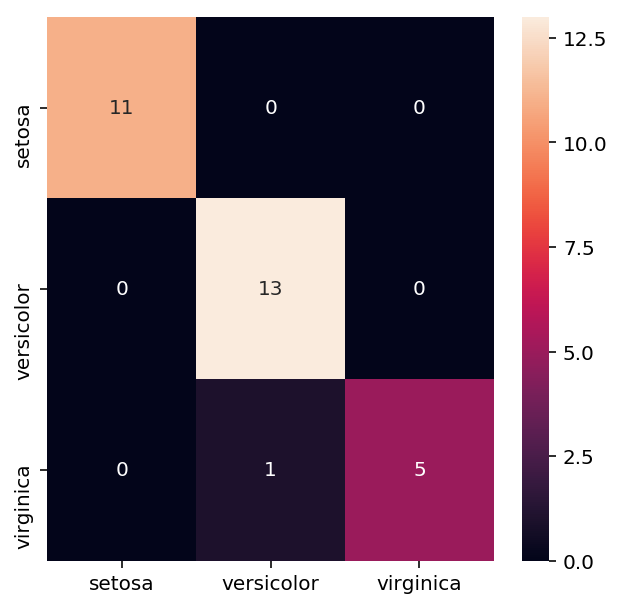

In [40]:
show_confusion_matrix(Y_test, y_pred, iris_data.target_names)

Now, we plot the confusion matrix of our `MLP` method: **`JoseHuillcaMLP`**.

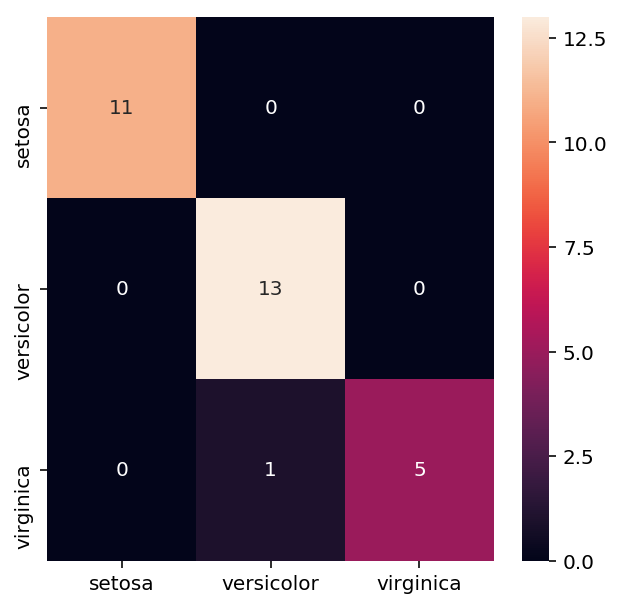

In [41]:
show_confusion_matrix(Y_test, jhMLP_pred, iris_data.target_names)

Now, we plot the confusion matrix of our `KNN` algorith: **`JoseHuillcaKNN`**.

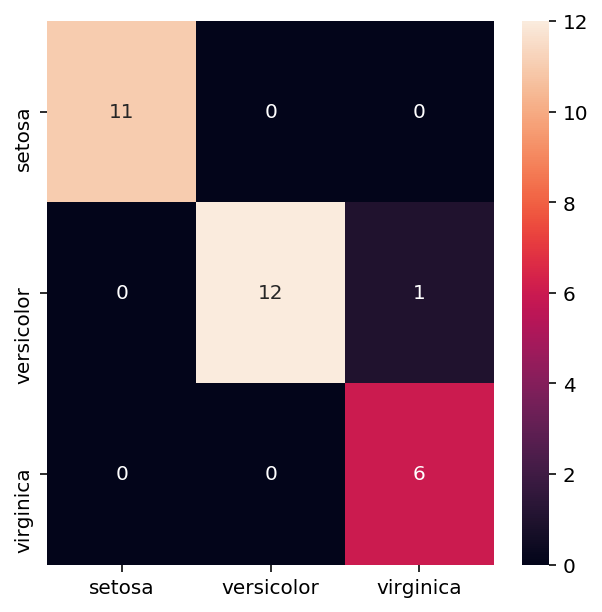

In [195]:
show_confusion_matrix(Y_test, jhKNN.predictions, iris_data.target_names)

## Conclusions

We obtained the same results in both methods presicion (`JoseHuillcaMLP`and `Linear SuperVectorClasifier`), with the same number of iterations or epochs and same tolerance, we use the same data to train and to do the test; but we only use one hidden layer in our MLP. You can get better results if you increase the number of iterations, but that would take more time, for our method, since it reaches a point where it does not converge and it is necessary to lower the learning rate, that would make learning slower.

Also, in `KNN algorithm` we obtained the same result with **k** equal to 3.

All results in accuracy were $96,6666666667\%$

In [45]:
jhMLP_pred = jhMLP.prediction(X_test, Y_test)

Accuracy = 96.66666666666667%


In [106]:
jhKNN.getAccuracy(jhKNN.Test)

Accuracy = 96.66666666666667%


#### System information

In [196]:
%load_ext version_information
%version_information numpy, matplotlib, sklearn

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.6.4 64bit [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
IPython 6.3.1
OS Darwin 17.3.0 x86_64 i386 64bit
numpy 1.14.2
matplotlib 2.2.2
sklearn 0.19.1
Fri May 18 01:36:23 2018 -03